<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-teammexcol/blob/main/Proyecto_Avances/Semana4_Actividad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentación

Ciencia y Analítica de Datos

**Equipo 40**

Por:

* Víctor Alejandro Regueira Romero - A01794404
* Carlos Julio León Caicedo - A01793947

Profesor asignado:

* Roberto Antonio Guevara González

A 11 de octubre de 2022
---

# Parte 1: Ejercicio guiado 

Asignamos a la variable input la liga con nuestro dataset que ya ha pasado por limpieza y filtrado.

## Paso 1:  Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

In [1]:
input = "https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-teammexcol/main/Proyecto_Avances/Dataset_Cleaned.csv"

Librerías

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importamos el dataset dentro de la variable df y asignamos la columna ID como index

In [3]:
df = pd.read_csv(input, index_col = 'ID')
df.head()

,amount_credit,gender,education,marital_status,age,hry_sep,hry_aug,hry_jul,hry_jun,hry_may,...,amt_apl,paid_sep,paid_aug,paid_jul,paid_jun,paid_may,paid_apl,Y,total_amt,total_paid
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0,7704.0,689.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0,17077.0,5000.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,101653.0,11018.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,231334.0,8388.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0,109339.0,59049.0


### Eliminar variables categóricas

Según la teoría, el mantener variables categóricas para el análisis de PCA sólo nos producirá un mayor porcentaje de desviaciones. Por lo que es importante sustraer dichas variables.

Creamos una lista de los valores que componen a las variables con prefijo amt.

In [4]:
lista_amt= list(df.iloc[:,11:17])
lista_amt

['amt_sep', 'amt_aug', 'amt_jul', 'amt_jun', 'amt_may', 'amt_apl']

Creamos una lista de los valores que componen a las variables con prefijo paid.

In [5]:
lista_paid = list(df.iloc[:,17:23])
lista_paid

['paid_sep', 'paid_aug', 'paid_jul', 'paid_jun', 'paid_may', 'paid_apl']

Creamos una lista de los valores que componen a las variables con prefijo hry.

In [6]:
lista_hry = list(df.iloc[:,5:11])
lista_hry

['hry_sep', 'hry_aug', 'hry_jul', 'hry_jun', 'hry_may', 'hry_apl']

Eliminamos las columnas con valores categóricos hry

In [7]:
df = df.drop(columns = lista_hry)

Eliminamos la variable paid, ya que los resultados serán sustituidos por su total_paid. Debido a que la relación que tiene con amt es muy alta. Esto lo pudimos deducir del análisis realizado en la limpieza de los datos.

In [8]:
df = df.drop(columns = lista_paid)

In [9]:
#df = df.drop(columns = lista_amt) # No eliminamos los valores de amt

Eliminamos las demás variables categóricas para sólo mantener variables continuas.

In [10]:
df = df.drop(columns = ['marital_status', 'education','gender'])

Hacemos una copia del DataFrame que contenga la variable de salida. De esta forma podemos utilizarla más adelante al momento de determinar los coeficientes de correlación

In [11]:
df_copy = df.copy()

In [12]:
df = df.drop(columns = ['Y'])

In [13]:
df.head(5)

,amount_credit,age,amt_sep,amt_aug,amt_jul,amt_jun,amt_may,amt_apl,total_amt,total_paid
ID,,,,,,,,,,
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,7704.0,689.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,17077.0,5000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,101653.0,11018.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,231334.0,8388.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,109339.0,59049.0


### Normalización

Para este caso debido a que la variable de salida Y se encuentra en el rango con valores de [0,1], hemos dicidido normalizar nuestro dataframe completo antes de realizar el análisis de componentes principales.

Por lo tanto, utilizaremos Normalización mín.-máx. ajustando los valores de registros para mantener un rango objetivo de [0, 1].

Para eso haremos la escalación usando la librería sklearn.preprocessing, e importaremos el método **MinMaxScaler**

In [14]:
from sklearn.preprocessing import MinMaxScaler

Definimos una variable para almacenar todos los nombres de nuestras columnas (atributos)

In [15]:
cols = df.columns

Corremos el método **MinMaxScaler()** y a este resultado le aplicamos el método fit_transform() para escalar nuestro DataFrame a valores entre [0,1].

In [16]:
df[cols] = MinMaxScaler().fit_transform(df[cols])
df.head(5)

,amount_credit,age,amt_sep,amt_aug,amt_jul,amt_jun,amt_may,amt_apl,total_amt,total_paid
ID,,,,,,,,,,
1,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.061420,0.000183
2,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.063094,0.001328
3,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.078197,0.002927
4,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.101353,0.002228
5,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.079569,0.015688


### Determinación de Componentes Principales (PC)
Es en el siguiente flujo en donde determinaremos cuál es el número de componentes que tienen la mayor concentración de proporción acumulada de la varianza.

Comenzamos importando la función PCA de la librería sklearn módulo **decomposition**

In [17]:
import numpy as np
from sklearn.decomposition import PCA

También importamos el método **preprocessing** para poder hacer el ajuste de la desviación estándar a cada una de las variables.

In [18]:
from sklearn.preprocessing import StandardScaler

Ajustamos la escala del DataFrame.

In [19]:
pcs = PCA() #Creamos variable pcs que almacena el método PCA().
scaler = StandardScaler() #Definimos variable scaler que almacena el método StandardScaler().
scaled = scaler.fit_transform(df) #scaled va a almacenar los valores de la estandarización de los valores.
pcs.fit(scaled) #Aplicar las transformaciones a nuestra  variable pcs.
pcs_t = pcs.fit_transform(scaler.fit_transform(df)) #variable pcs_t almacena los valores aplicados de la transformación de pcs

In [20]:
scaled_df = pd.DataFrame(scaled, columns=df.columns)

In [21]:
pcs.components_[:5]

array([[ 0.14223154,  0.02866217,  0.35849355,  0.36732633,  0.37032744,
         0.37258063,  0.36874918,  0.36044778,  0.38485939,  0.15977594],
       [ 0.64915376,  0.52335723, -0.10624748, -0.10531695, -0.06659292,
        -0.06186581, -0.05193642, -0.04333566, -0.0781326 ,  0.51320011],
       [ 0.23016229, -0.82319805, -0.08879217, -0.07451679, -0.02562416,
        -0.01720645, -0.00426887,  0.00545327, -0.03862586,  0.50342916],
       [-0.70873384,  0.21810395, -0.11548139, -0.06607813,  0.02881403,
         0.02884995,  0.04461461,  0.05916922, -0.00821107,  0.65207614],
       [-0.04317203, -0.00686129,  0.49539198,  0.4048471 ,  0.19673344,
        -0.18392267, -0.44305391, -0.54116173,  0.02092572,  0.16325576]])

In [22]:
pcs_t[:5]

array([[-1.99040632e+00, -1.31265025e+00,  6.67773104e-01,
         2.18080345e-01,  1.89667838e-02, -1.25106996e-02,
        -6.50557957e-03, -2.24768955e-03,  1.44708110e-03,
         6.39979493e-15],
       [-1.79657630e+00, -6.70823563e-01,  7.02581946e-01,
        -2.23605505e-01, -7.83075315e-02,  2.92793591e-02,
         2.98605511e-03,  3.63814316e-03,  5.64150053e-03,
         1.71100076e-15],
       [-1.24429741e+00, -4.29503019e-01, -7.57170271e-02,
         1.69367715e-01, -1.04746984e-03, -9.94793488e-02,
        -4.78361816e-02,  9.53082589e-02,  4.84395647e-02,
         5.63275980e-14],
       [-4.50194076e-01, -6.54182489e-01, -5.23474583e-01,
         4.13630101e-01,  1.56111943e-01,  1.49616851e-02,
         1.43871291e-01, -1.94528610e-02,  4.06243814e-02,
        -4.15842492e-15],
       [-1.02188837e+00,  1.08838981e+00, -1.78130465e+00,
         1.50574500e+00, -8.05970507e-02,  1.88146758e-01,
         1.07568559e-01,  1.05352881e-01,  8.91572701e-02,
         2.

Veamos el total de componentes divididos por variavles de Desviación Estándar, Proporción de varianza y Proporción Acumulada

In [23]:
pcsSummary_df = pd.DataFrame({'Desviación estándar': np.sqrt(pcs.explained_variance_),
                             'Proporción de varianza': pcs.explained_variance_ratio_,
                             'Proporción Acumulada': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.T
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Desviación estándar,2.5870,1.0802,0.9752,0.8005,0.5405,0.3297,0.2572,0.2038,0.2008,0.0
Proporción de varianza,0.6693,0.1167,0.0951,0.0641,0.0292,0.0109,0.0066,0.0042,0.0040,0.0
Proporción Acumulada,0.6693,0.7859,0.8810,0.9451,0.9743,0.9852,0.9918,0.9960,1.0000,1.0


Veamos la relación de los componentes con las variables de entrada.

In [24]:
pcsComponents_df = pd.DataFrame(pcs.components_.round(4),#datos pcs.components nos da los pesos de cada uno de los componentes
                                columns=pcsSummary_df.columns,#columnas Son 10 columnas, las cuales hacen referencia a cada uno de los componentes: PC1, PC2...PC10
                                index=df.columns#índice (ID) Las filas son 10 también, las cuales hacen referencia a las variables originales
                                )
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
amount_credit,0.1422,0.0287,0.3585,0.3673,0.3703,0.3726,0.3687,0.3604,0.3849,0.1598
age,0.6492,0.5234,-0.1062,-0.1053,-0.0666,-0.0619,-0.0519,-0.0433,-0.0781,0.5132
amt_sep,0.2302,-0.8232,-0.0888,-0.0745,-0.0256,-0.0172,-0.0043,0.0055,-0.0386,0.5034
amt_aug,-0.7087,0.2181,-0.1155,-0.0661,0.0288,0.0288,0.0446,0.0592,-0.0082,0.6521
amt_jul,-0.0432,-0.0069,0.4954,0.4048,0.1967,-0.1839,-0.4431,-0.5412,0.0209,0.1633
amt_jun,0.0294,-0.0016,-0.4595,-0.1260,0.5938,0.4711,-0.0548,-0.4363,-0.0017,-0.0654
amt_may,0.0173,-0.0012,-0.2500,0.0847,0.5746,-0.5695,-0.2724,0.4471,0.0024,-0.0386
amt_apl,-0.0073,-0.0003,0.4755,-0.6909,0.1690,0.2316,-0.4020,0.2296,0.0045,-0.0046
total_amt,-0.0029,-0.0003,0.2493,-0.3874,0.2807,-0.4453,0.6345,-0.3288,0.0016,-0.0044
total_paid,0.0000,0.0000,-0.1782,-0.1722,-0.1678,-0.1557,-0.1471,-0.1441,0.9186,-0.0000


In [25]:
pcs_labels = [f'PC{i + 1}' for i in range(len(df.columns))] 
pcs_labels

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

In [26]:
#Creamos un dataframe con los valores de cada componente. Cada valor del componente se le conoce como "Peso"
pcs_df = pd.DataFrame(pcs_t, columns = pcs_labels)
pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.990406,-1.312650,0.667773,0.218080,0.018967,-0.012511,-0.006506,-0.002248,0.001447,6.399795e-15
1,-1.796576,-0.670824,0.702582,-0.223606,-0.078308,0.029279,0.002986,0.003638,0.005642,1.711001e-15
2,-1.244297,-0.429503,-0.075717,0.169368,-0.001047,-0.099479,-0.047836,0.095308,0.048440,5.632760e-14
3,-0.450194,-0.654182,-0.523475,0.413630,0.156112,0.014962,0.143871,-0.019453,0.040624,-4.158425e-15
4,-1.021888,1.088390,-1.781305,1.505745,-0.080597,0.188147,0.107569,0.105353,0.089157,2.966201e-15
...,...,...,...,...,...,...,...,...,...,...
29953,2.895624,-0.124180,-0.566684,-0.388010,2.380559,0.768779,0.515276,0.022455,0.059060,-1.526100e-16
29954,-1.657855,0.519968,-0.686045,0.118910,-0.078398,0.100017,-0.073622,-0.008209,-0.000326,7.165002e-17
29955,-1.421600,-0.332570,-0.234925,0.842669,-0.288882,-0.033760,-0.138888,0.009213,-0.031966,-7.003250e-17
29956,0.213571,0.862971,0.330534,1.908057,0.316910,0.405418,0.489923,-0.296099,-0.644171,-1.268943e-16


In [27]:
total_var = scaled_df.var().sum()
pd.DataFrame({
"Porcentaje Varianza": (scaled_df.var()/ total_var) * 100,
"Porcentaje Varianza Acumulado": (scaled_df.var().cumsum() / total_var) *100
})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
amount_credit,10.0,10.0
age,10.0,20.0
amt_sep,10.0,30.0
amt_aug,10.0,40.0
amt_jul,10.0,50.0
amt_jun,10.0,60.0
amt_may,10.0,70.0
amt_apl,10.0,80.0
total_amt,10.0,90.0
total_paid,10.0,100.0


In [28]:
#print("Varianza total variables originales:\t", round(df.var().sum(),7))
#print("Varianza total de los componentes:\t", round(pcs_df.var().sum(),7))

Veamos la información antes mostrada representada en un gráfico para facilitar el análisis.

In [29]:
pcs_labels #Guardamos las etiquetas de los componentes

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

In [30]:
len(pcs_labels) #Número de componentes

10

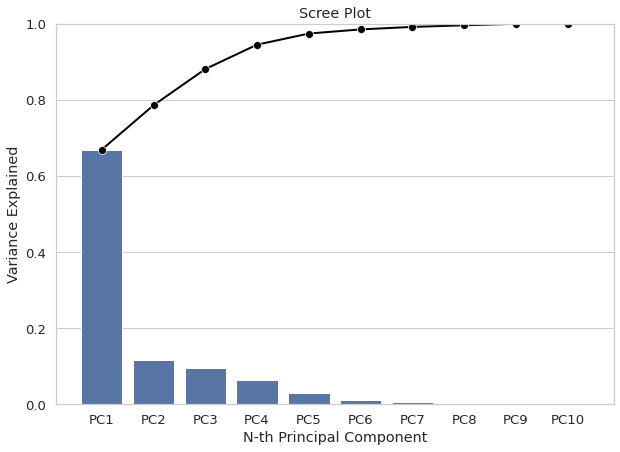

In [31]:
PC_components = np.arange(len(pcs_labels))
#PC_components

#La configuración del fondo y tamaño de texto del gráfico
sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7)) #área de gráfico total

#Gráfico de barras
sns.barplot(x = pcs_labels, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

#Gráfico de línea
sns.lineplot(x = PC_components, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )
#Titulos
plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [32]:
pcsSummary_df = pd.DataFrame({
'% varianza explicada': np.round(pcs.explained_variance_ratio_,4) * 100,
'% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100
},
index = pcs_labels)
pcsSummary_df

,% varianza explicada,% varianza acumulada
PC1,66.93,66.925975
PC2,11.67,78.593490
PC3,9.51,88.103143
PC4,6.41,94.511659
PC5,2.92,97.433161
PC6,1.09,98.520000
PC7,0.66,99.181512
PC8,0.42,99.596745
PC9,0.40,100.000000
PC10,0.00,100.000000


In [33]:
pcs.explained_variance_ratio_[:4].sum()*100

94.51165851645369

En nuestro caso para tener un porcentaje alto de varianza acumulada en nuestro modelo, optamos por utilizar **4 componentes principales**,los cuales representarán el **94.51%** de la varianza total

## Paso 2

In [34]:
total_var = df.var().sum()
pd.DataFrame({
"Porcentaje Varianza": (df.var()/ total_var) * 100,
"Porcentaje Varianza Acumulado": (df.var().cumsum() / total_var) *100
})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
amount_credit,25.650753,25.650753
age,37.697391,63.348144
amt_sep,6.348245,69.696389
amt_aug,6.821773,76.518162
amt_jul,2.167638,78.685800
amt_jun,5.490675,84.176475
amt_may,5.433333,89.609808
amt_apl,3.131490,92.741298
total_amt,6.868299,99.609597
total_paid,0.390403,100.000000


In [35]:
pcsComponents_df.idxmax() #Nos interesa buscar los máximos por filas, no por columnas. Por eso usamos idxmax
#Si quisieramos especidicar en una sola columna, llamaríamos el nombre del componente (PCA1)

PC1            age
PC2            age
PC3        amt_jul
PC4        amt_jul
PC5        amt_jun
PC6        amt_jun
PC7      total_amt
PC8        amt_may
PC9     total_paid
PC10       amt_aug
dtype: object

In [36]:
pcsComponents_df.idxmin() #Nos interesa buscar los mínimos por filas, no por columnas. Por eso usamos idmin

PC1        amt_aug
PC2        amt_sep
PC3        amt_jun
PC4        amt_apl
PC5     total_paid
PC6        amt_may
PC7        amt_jul
PC8        amt_jul
PC9            age
PC10       amt_jun
dtype: object

In [37]:
pcsComponents_df.PC1.nlargest(5)

age              0.6492
amt_sep          0.2302
amount_credit    0.1422
amt_jun          0.0294
amt_may          0.0173
Name: PC1, dtype: float64

In [38]:
pcsComponents_df.PC1.nsmallest(5)

amt_aug      -0.7087
amt_jul      -0.0432
amt_apl      -0.0073
total_amt    -0.0029
total_paid    0.0000
Name: PC1, dtype: float64

Observamos la correlación entre las variables

In [39]:
corrmatt = df.corr()
corrmatt

,amount_credit,age,amt_sep,amt_aug,amt_jul,amt_jun,amt_may,amt_apl,total_amt,total_paid
amount_credit,1.000000,0.144515,0.285616,0.278435,0.283373,0.294090,0.295625,0.290517,0.302176,0.352499
age,0.144515,1.000000,0.056357,0.054469,0.053911,0.051528,0.049515,0.047810,0.055163,0.040752
amt_sep,0.285616,0.056357,1.000000,0.951494,0.892272,0.860273,0.829781,0.802638,0.940106,0.256352
amt_aug,0.278435,0.054469,0.951494,1.000000,0.928306,0.892456,0.859756,0.831570,0.961170,0.286628
amt_jul,0.283373,0.053911,0.892272,0.928306,1.000000,0.923953,0.883893,0.853302,0.961950,0.359513
amt_jun,0.294090,0.051528,0.860273,0.892456,0.923953,1.000000,0.940133,0.900931,0.964495,0.354552
amt_may,0.295625,0.049515,0.829781,0.859756,0.883893,0.940133,1.000000,0.946187,0.951671,0.359727
amt_apl,0.290517,0.047810,0.802638,0.831570,0.853302,0.900931,0.946187,1.000000,0.928710,0.362983
total_amt,0.302176,0.055163,0.940106,0.961170,0.961950,0.964495,0.951671,0.928710,1.000000,0.343832
total_paid,0.352499,0.040752,0.256352,0.286628,0.359513,0.354552,0.359727,0.362983,0.343832,1.000000


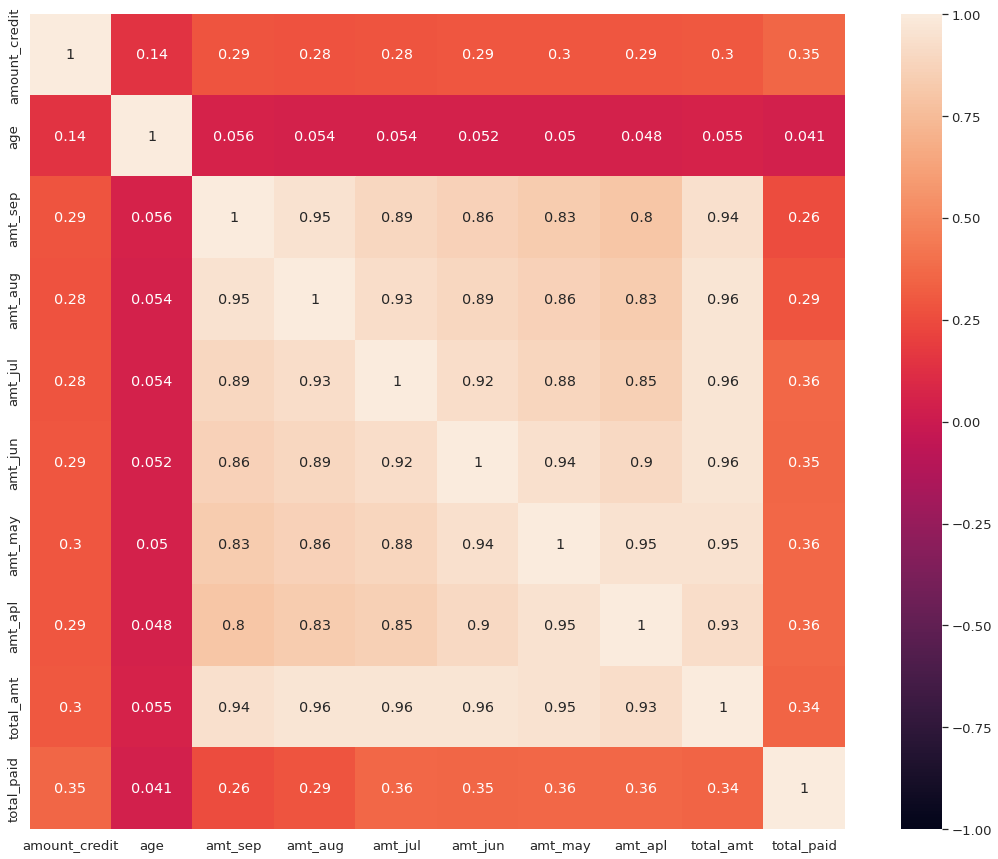

In [40]:
f, ax = plt.subplots(figsize = (20,15)) #Definir el área de trabajo.
sns.heatmap(corrmatt, vmax = 1, vmin = -1, square = True, annot = True)

Observamos que obteniendo los coeficientes de las variables tenemos una correlación directa muy alta entre nuestra columna total_amt y todas las columnas amt, por lo que esta variable nos podría ser útil para tomar en cuenta dentro de las variables principales de nuestro modelo.

También tenemos que tener en cuenta las variables **age, amount_credit y total_paid**

In [41]:
corrmatt_y = df_copy.corr()
corrmatt_y

,amount_credit,age,amt_sep,amt_aug,amt_jul,amt_jun,amt_may,amt_apl,Y,total_amt,total_paid
amount_credit,1.000000,0.144515,0.285616,0.278435,0.283373,0.294090,0.295625,0.290517,-0.153781,0.302176,0.352499
age,0.144515,1.000000,0.056357,0.054469,0.053911,0.051528,0.049515,0.047810,0.013881,0.055163,0.040752
amt_sep,0.285616,0.056357,1.000000,0.951494,0.892272,0.860273,0.829781,0.802638,-0.019686,0.940106,0.256352
amt_aug,0.278435,0.054469,0.951494,1.000000,0.928306,0.892456,0.859756,0.831570,-0.014240,0.961170,0.286628
amt_jul,0.283373,0.053911,0.892272,0.928306,1.000000,0.923953,0.883893,0.853302,-0.014141,0.961950,0.359513
amt_jun,0.294090,0.051528,0.860273,0.892456,0.923953,1.000000,0.940133,0.900931,-0.010216,0.964495,0.354552
amt_may,0.295625,0.049515,0.829781,0.859756,0.883893,0.940133,1.000000,0.946187,-0.006856,0.951671,0.359727
amt_apl,0.290517,0.047810,0.802638,0.831570,0.853302,0.900931,0.946187,1.000000,-0.005505,0.928710,0.362983
Y,-0.153781,0.013881,-0.019686,-0.014240,-0.014141,-0.010216,-0.006856,-0.005505,1.000000,-0.012767,-0.102355
total_amt,0.302176,0.055163,0.940106,0.961170,0.961950,0.964495,0.951671,0.928710,-0.012767,1.000000,0.343832


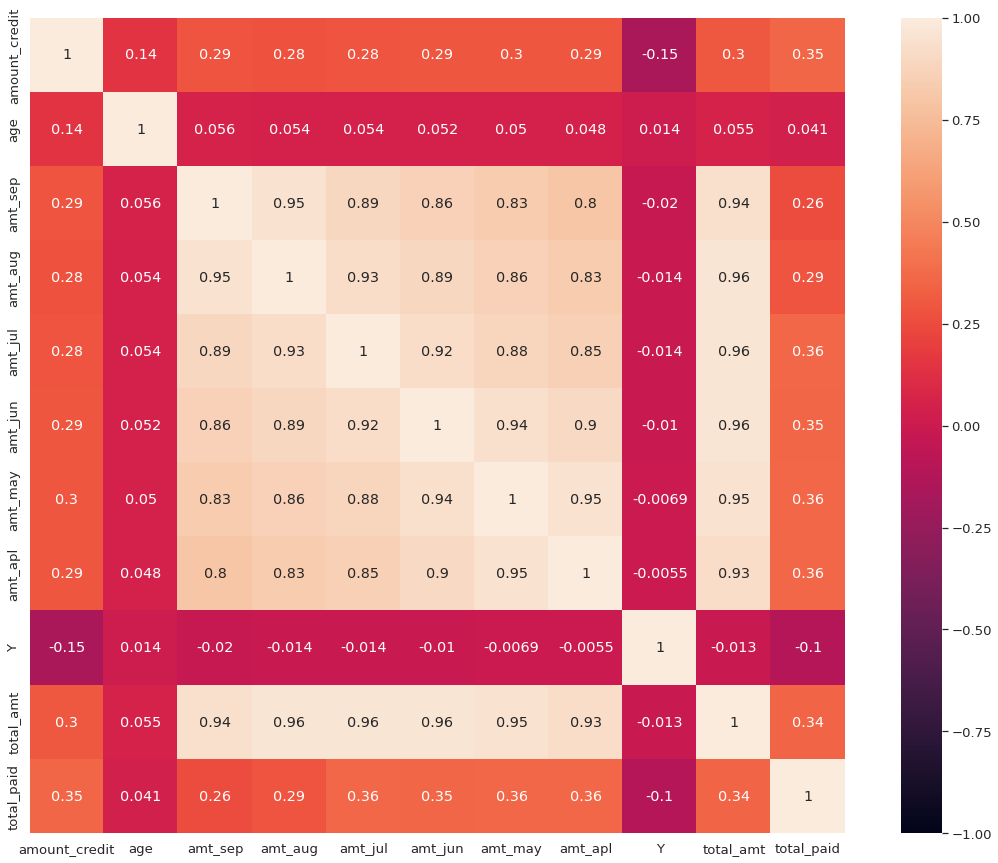

In [42]:
f, ax = plt.subplots(figsize = (20,15)) #Definir el área de trabajo.
sns.heatmap(corrmatt_y, vmax = 1, vmin = -1, square = True, annot = True)

Tomando en cuenta la correlación que tienen las variables de entrada con la salida, vemos que un exsite una correlación alta en ninguna de las variables.

La única que tiene una correlación pequeña es el **total_paid**

## Paso 3: Identifique valores atípicos

Para determinar los valores atípicos debemos de utilizar  el diagrama de cajas y bigotes.

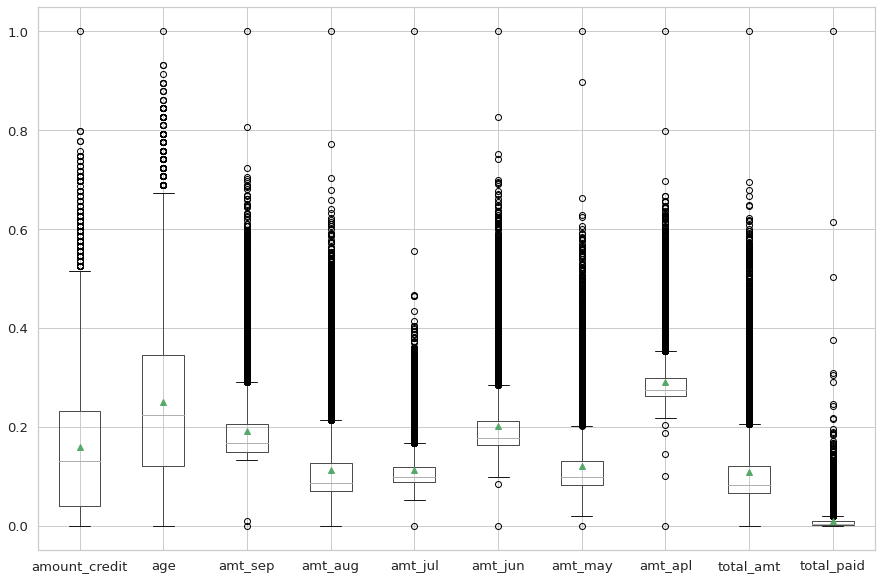

In [43]:
val_atp = df.boxplot(figsize = (15,10),showmeans = True)
val_atp.plot()
plt.show()

Se observa que una gran cantidad de valores se encuentran fuera de los límites establecidos por los bigotes, estos valores se consideran como atípicos o outlayers, que se alejan mucho de los valores comúnes de nuestra data.

# Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook


1. ¿Cuál es el número de componentes mínimo y por qué?

El número de componentes principales a utilizar sería de **4 valores**. Debido a que con esta cantidad estaríamos abarcando el 94.51% de la varianza de los daots. Sin embargo, si se requiriera utilizar menos variables, lo mínimo de componentes que se recomendaría sería de 3, correspondientes al 88% de la varianza acumulada.


2. ¿Cuál es la variación de los datos que representan esos componentes?


3. ¿Cuál es la pérdida de información después de realizar PCA?

Perderíamos el 5.6% de los valores en caso de utilizar 4 componentes y el 12% en dado caso de utilizar 3 componentes.

4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

Según el PCA las variables se dividirían en directa e indirecta.

Directa:

* age              0.6492
* amt_sep          0.2302
* amount_credit    0.1422
* amt_jun          0.0294

Indirecta:

* amt_aug      -0.7087
* amt_jul      -0.0432
* amt_apl      -0.0073
* total_amt    -0.0029

5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

*Nota: Aquí es donde podríamosexplicar más, colocando imágenes y algún artículo de referencia*